## Random Forest

In [1]:
import pandas as pd

# load dataset
df = pd.read_csv('cleaned_Suicide_Detection_with_Token.csv')  


In [2]:
from sklearn.model_selection import train_test_split

# split into training and testing sets (70 30)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=42)


In [3]:
# encode labels (suicide=1 non-suicide=0)
y_train = y_train.map({'suicide': 1, 'non-suicide': 0})
y_test = y_test.map({'suicide': 1, 'non-suicide': 0})


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 100)
random_forest.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=100)

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# predict test 
y_pred = random_forest.predict(X_test_tfidf)

#  training accuracy
trainAccuracy = random_forest.score(X_train_tfidf, y_train)
print("Training Accuracy:", trainAccuracy)

# training loss (MISC)
training_loss = random_forest.score(X_train_tfidf, y_train)
print("Training Loss (MISC):", 1 - training_loss)

# test accuracy
testAccuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testAccuracy)

# precison recall f1score
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9997271182446261
Training Loss (MISC): 0.00027288175537387716
Testing Accuracy: 0.9031039722161928
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     34504
           1       0.90      0.91      0.90     34601

    accuracy                           0.90     69105
   macro avg       0.90      0.90      0.90     69105
weighted avg       0.90      0.90      0.90     69105



Confusion Matrix:
[[30825  3679]
 [ 3017 31584]]


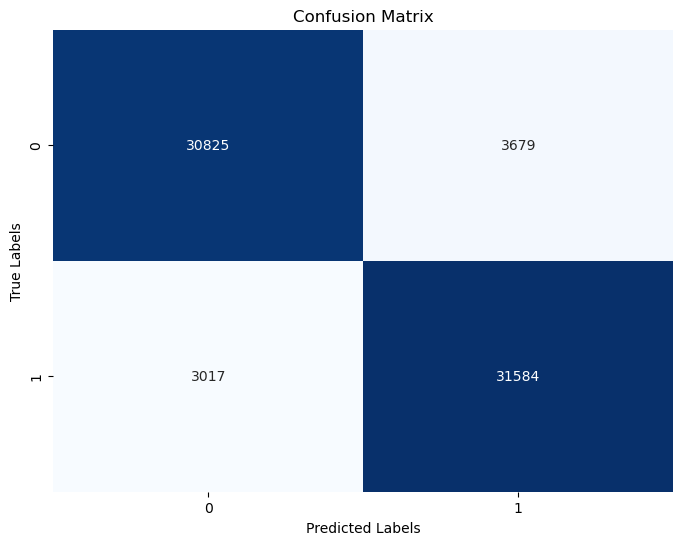

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


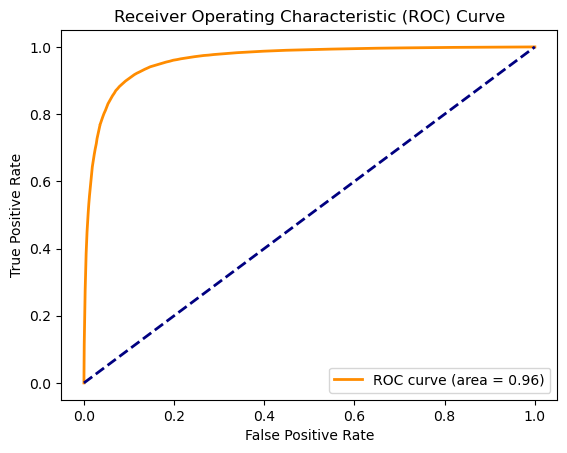

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve 
y_pred_proba = random_forest.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
# save model
import joblib

joblib.dump(random_forest, 'randomForest_model.pkl')


['randomForest_model.pkl']